In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv("data/train.csv")

In [83]:
df.shape

(891, 12)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### How many people were there on titanic?

In [4]:
total_people_in_training_set = pd.read_csv("data/train.csv")
total_people_in_test_set = pd.read_csv("data/test.csv")

total_people_in_training_set.shape[0] + total_people_in_test_set.shape[0]

1309

#### What was the survival rate?

In [6]:
df['Survived'].sum() / df['Survived'].count()

0.3838383838383838

#### What was the survival rate for men and women?

In [10]:
df[df['Sex'] == 'male']['Survived'].sum()

109

In [11]:
df[df['Sex'] == 'male']['Survived'].sum() / df[df['Sex'] == 'male']['Survived'].count()

0.18890814558058924

In [29]:
df[df['Sex'] == 'female']['Survived'].sum() / df[df['Sex'] == 'female']['Survived'].count()

0.7420382165605095

#### How many unique classes were there?

In [30]:
df['Pclass'].unique()

array([3, 1, 2])

#### Did rich people survived more?

In [47]:
total_men = df[df['Sex'] == 'female']

In [48]:
pd.crosstab(total_men['Pclass'], total_men['Survived'], margins = True)

Survived,0,1,All
Pclass,,,
1,3,91,94
2,6,70,76
3,72,72,144
All,81,233,314


In [49]:
77/122

0.6311475409836066

In [45]:
91 / 108

0.8425925925925926

In [46]:
300 / 347

0.8645533141210374

In [50]:
3 / 94

0.031914893617021274

In [52]:
70 / 76

0.9210526315789473

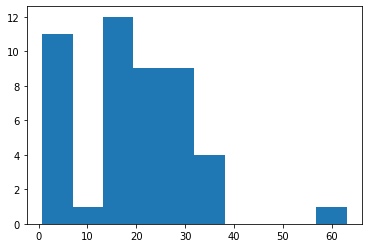

In [67]:
plt.hist(df[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['Survived'] == 1)]['Age'])
plt.show()

In [60]:
df[(df['Pclass'] == 1) & (df['Sex'] == 'female') & (df['Survived'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [62]:
df[df['Ticket'] == '113781']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C22 C26,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,NaN,S


In [70]:
df[(df['Pclass'] == 3) & (df['Sex'] == 'female') & (df['Survived'] == 0)]["Age"].describe()

count    55.000000
mean     23.818182
std      12.833465
min       2.000000
25%      15.250000
50%      22.000000
75%      31.000000
max      48.000000
Name: Age, dtype: float64

#### How many senior citizens were there?

In [74]:
df[(df['Age'] >= 60) & df['Survived'] == 1].shape[0]

7

#### How many people were travelling without a cabin?

In [80]:
df[df['Cabin'].isna()].shape[0]

687

#### What was the most expensive cabin?

In [93]:
df['Cabin'] = df['Cabin'].fillna(value = 'Z')

In [102]:
df['Cabin'] = df['Cabin'].str[0]

In [103]:
df.groupby(df['Cabin'].str[0])['Fare'].max()

Cabin
A     81.8583
B    512.3292
C    263.0000
D    113.2750
E    134.5000
F     39.0000
G     16.7000
T     35.5000
Z    512.3292
Name: Fare, dtype: float64

In [137]:
pd.pivot_table(df[df['Fare'] > 0], index = ['Cabin'], columns = ['Pclass'], values = ['Fare'])

Fare                      
Pclass           1          2          3
Cabin                                   
A        42.454164        NaN        NaN
B       118.550464        NaN        NaN
C       100.151341        NaN        NaN
D        63.324286  13.166675        NaN
E        55.740168  11.587500  11.000000
F              NaN  23.750000  10.611660
G              NaN        NaN  13.581250
T        35.500000        NaN        NaN
Z        80.893308  21.684105  13.840656

In [114]:
df['Cabin']

0      Z
1      C
2      Z
3      C
4      Z
      ..
886    Z
887    B
888    Z
889    C
890    Z
Name: Cabin, Length: 891, dtype: object

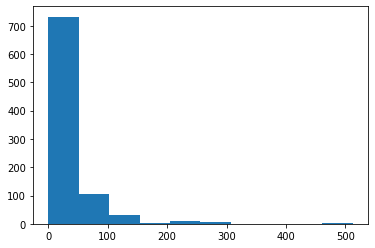

In [110]:
plt.hist(df['Fare'])
plt.show()

In [151]:
df[(df['Fare'] == 0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,Z,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,Z,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,Z,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,Z,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,Z,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,Z,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,Z,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,Z,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,Z,S


#### Can you find a nanny?

In [167]:
tickets = df[(df['Parch'] == 0) & (df['Age'] < 15)]['Ticket'].unique()
tickets

array(['237736', '350406', '2651', '2665', '2699', '364516', '2687'],
      dtype=object)

In [163]:
df[(df['Age'] > 18) & (df['Ticket'].isin(tickets))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,Z,S
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,Z,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,Z,C


In [180]:
df[df['Ticket'] == '350406']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,Z,S
